# KRY projekt 1

<strong>Autor: Adam Zvara</strong> <br>
<strong>Login: xzvara01</strong> <br>
<strong>Dátum: 22.02.2024</strong> <br>

V tejto dokumentácii je popis riešenia prvého projektu do predmetu KRY, ktorého náplňou je dešifrovanie TTS šifry používanej československou exilovou vládou počas druhej svetovej vojny.

## Načítanie vstupu
V prvom rade je potrebné si prednačítať vstup do správneho formátu, aby sme s ním mohli pracovať. Zo spoločného súboru šifier som si okopíroval moje zašifrované správy do lokálneho súboru a načítal ich do zoznamu. Zároveň je vhodné si sekvenciu šifrovaného textu rozdeliť na dvojice čísel, ktoré predstavujú jeden zašifrovaný symbol.

In [2]:
original = []
with open("mycipher.txt", "r") as f:
    for line in f:
        if line[0] in ["#", "\n"]: continue
        line = "".join(line.split()[1:]) # Remove 'ZP#' and spaces
        original.append(line)

# Split each ciphertext into 2-character chunks
ciphertext = [ [line[i:i+2] for i in range(0, len(line), 2)] for line in original]
print(ciphertext[0][0:10], "...")

['37', '21', '20', '08', '37', '07', '23', '19', '09', '28'] ...


## Riešenie substitučnej šifry

Z priložených materiálov v zadaní projektu je možné sa dočítať, že konečná substitučná šifra vychádza z abecedy (taktiež definovanej v zadaní projektu) a dňa, v ktorý sa šifra realizovala. <br>

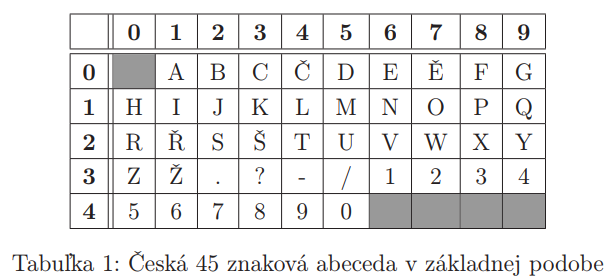 <br>
Zdroj: http://crypto-world.info/casop13/crypto01_11.pdf

<br>

Ďalším krokom je vytvorenie substitučnej tabuľky, ktorá bude indexovaná číslami zašifrovaného textu. Pomocou nej je možné previesť číslice na znaky následujúcim spôsobom. Zároveň som v tomto kroku definoval funkciu `cprint(ctext, colRange, solved)` na výpis zašifrovaného textu spolu s indexami, ktorý bude užitočný v priebehu dešifrovania.

In [3]:
# Letter 'a' starts at 4th position in the alphabet (counting from 0)
alphabet = [
["X", "8", "9", "0", "a", "b", "c", "č", "d", "e"], 
 ["ě", "f", "g", "h", "i", "j", "k", "l", "m", "n"], 
 ["o", "p", "q", "r", "ř", "s", "š", "t", "u", "v"],
 ["w", "x", "y", "z", "ž", ".", "?", "-", "/", "1"], 
 ["2", "3", "4", "5", "6", "7"]]

def numToLetter(x, alpha=alphabet):
    """ Convert number from ciphertext into letter """
    row = x // 10
    col = x % 10
    return alpha[row][col]

# Convert ciphertext from nums to text
newCiphertext = []
for line in ciphertext:
    convLine = list(map(numToLetter, list(map(int, line))))
    newCiphertext.append(convLine)

ciphertext = newCiphertext

def cprint(ctext, colRange=None, solved=None):
    """ Pretty print ciphertext 
    ctext: ciphertext; colRange: range of columns to print
    solved: list of tuples (row, col) of solved letters
    """
    ...
        
cprint(ciphertext, [0,5]) # Print first 5 columns of ciphertext

In [4]:
for i in ciphertext:
    print("".join(i))

-pod-črneuakoiiplvuyeepapieaao-cořkrr-zlcva-jv-ek-vemzve-f-p
nzte-aa-eriezyř-aessnpepsjtšeiaauuřěmekpn---aeu-ielrykpnlnnz
htl-uee-etiřzntuismtdpe-slpšuoieusnědřkanjs-eloeeoarnep-knp-
akokl-č-juooiaaludodosupo-ulo-vrpuoil-rruhje-o-dmdoeobmp-mpo
cpe--zld-ěiaiyesonv-ls--aaabseelz-pounllypedšpa-aeuraoonrznr
ytno-jmjmia-yuakaa-knss-ydhlaspcvesituvtavset-pevazzla-e-rmř
lpui-rrilesnkut-řkoppveaočn-ašken-vekyospm-a-o--ar-yarnndjiy
ion-k-ou0jnur-epmab-nvokz-erbmicxaaad-ajaol1-eaanistrv-pejch


In [22]:
# Function to pretty print ciphertext
def cprint(ctext, colRange=None, solved=None):
    if colRange is None:
        if solved is not None:
            # Print solved
            print(2 * " ", end='') # Starting indent
            for i in range(0, solved):
                print(f".    ", end="")
            print()
        # Print indexes
        print(2 * " ", end='') # Starting indent
        for i in range(6):
            print((4 * " ").join([str(x) for x in range(10)]), end="")
            print(4 * " ", end="")
        print("")
        for line in ctext: print(line) # Print ciphertext
    else:
        # Print indexes
        print(2 * " ", end='')
        for i in range(colRange[0], colRange[1]):
            if i < 10: 
                print(f"{i}    ", end="")
            else:
                print(f"{i}   ", end="")
        print("")
        for line in ctext: print(line[colRange[0]:colRange[1]])

## Riešenie transpozičných šifier

Na riešenie transpozičných šifier som použil postup uvedený v prednáškach predmetu, kedy pri správach s rovnakou dĺžkou môžeme nad TT uvažovať ako nad jednou transpozičnou šifrou a riešiť ju ako celok. Princípom dešifrovania je preusporiadanie jednotlivých stĺpcov na správne pozície. Na realizáciu dešifrovania som si definoval niekoľko pomocných funkcií.

In [23]:
def getCol(ctext, col):
    """ Retrieve column from ciphertext """
    ...
    
def swapCols(ctext, c1, c2):
    """ Swap two columns in the ciphertext """
    ...
    
def findLetter(ctext, row, letter, solved=[]):
    """ Find letter in the ciphertext at given row 
    solved is a list of indexes of letters that are already solved (so they won't be considered)
    """
    ...

In [38]:
def getCol(ctext, col):
    """ Retrieve column from ciphertext """
    cols = list(zip(*ctext))
    return cols[col]

def swapCols(ctext, c1, c2):
    """ Swap two columns in the ciphertext """
    # "Transpose" the columns into rows
    cols = list(zip(*ctext))
    # Swap selected columns
    tmp = cols[c1]
    cols[c1] = cols[c2]
    cols[c2] = tmp
    # Put the columns back into the ciphertext
    return list(zip(*cols))

def findLetter(ctext, row, letter, solved=[]):
    """ Find letter in the ciphertext at given row 
    solved is a list of indexes of letters that are already solved
    """
    idxs = [i for i in range(len(ctext[0])) if ctext[row][i] == letter and i not in solved]
    return idxs

Začneme najjednoduchším slovom na umiestnenie, ktorým je `xzvara01`, pretože obsahuje pomerne vzácne písmená českej abecedy (x) a zároveň obsahuje aj jediné 2 číslice v zašifrovanom texte. V prvom rade je potrebné nájsť písmeno `x`, ktoré sa nachádza v poslednej správe. Zároveň je v tejto správe iba jediný výskyt písmena `z`, preto ich môžeme umiestniť za seba.

In [39]:
# Create a copy of the ciphertext to work with and not modify the original
cc = ciphertext.copy() 

# Find letter z in the last row and swap it to its next position
xpos = findLetter(cc, 7, "x")
zpos = findLetter(cc, 7, "z")
cc = swapCols(cc, xpos[0] + 1, zpos[0])

cprint(cc, [32, 34])

  32   33   
('o', 'p')
('u', 's')
('u', 's')
('p', 'o')
('z', 'a')
('v', 'y')
('n', 'o')
('x', 'z')


Následujúce písmená však nie je tak jednoduché uhádnuť, pretože napríklad písmeno `a` má v poslednej správe niekoľko výskytov. Keďže som predpokladal, že tento problém budem musieť riešiť častejšie tak som vytvoril funkciu, ktorá vypíše všetky možné kombinácie stĺpcov pre dané slovo na danej pozícii. Takýmto spôsobom nie je nutné manuálne presúvanie stĺpcov pri skúmaní slóv.

In [26]:
# Try all different combinations of swapping columns to find the given word in a 
# specific row. Function splits the word into letters. Then it starts from 
# startColumn position and tries to find all the letters in the word in the given 
# row, except those positions which are already in solved.
# 
# For example guessWord(cc, 1, "ahoj", 5, [1]) will look for word "ahoj" -> "_H__" 
#   in the first column at position 5 and print all the possibilities, when multiple 
#   columns with given letters are found except the column 1 (the start of the word 
#   is at column 0), which is already solved, so it will skip that
def guessWord(ctext, row, word, startColumn, solved=[], _pos=0):
    ...
    
# Display all the combinations of the word from guessWord function
#  omit is a list of indexes of combinations that won't be displayed
def printWordCombinations(ctext, combList, startPos, omit=[]):
    ...

In [40]:
def guessWord(ctext, row, word, startColumn, solved=[], _pos=0):
    # Get the results of the next letter in the word
    res = guessWord(ctext, row, word[1:], startColumn, solved, _pos+1) if len(word) > 1 else []
    # If the letter is solved, return the result
    if _pos in solved:
        if res == []: return [[startColumn + _pos]]
        return [[startColumn + _pos] + r for r in res]
    # Take the first letter of the word
    letter = word[0]
    # Find all the positions of the letter in the row
    idxs = findLetter(ctext, row, letter)
    
    assert idxs != [], "Letter not found"
    
    if res == []:
        return [[x] for x in idxs]
    
    # Return all the combinations of the positions of the letters with the results of the next letters
    return [[x] + r for x in idxs for r in res if x not in r]

def printWordCombinations(ctext, combList, startPos, omit=[]):
    for idx, comb in enumerate(combList):
        if idx in omit: continue # Skip the combinations I don't like
        print(40 * "-" + f"\nCombination {idx}: " + str(comb))
        # Apply the combination to the ciphertext
        cc = ctext.copy()
        rangePos = range(startPos, startPos + len(comb))
        # First, swap the columns which indexes overlap with the posision of the word, as other swaps might mess up the letters at those positions
        firstSwaps = list(map(lambda x: x if x in rangePos else None, comb))
        restSwaps = list(map(lambda x: x if x not in rangePos else None, comb))
        
        def doSwaps(c, swaps):
            for i in range(0, len(swaps)):
                if swaps[i] is not None:
                    c = swapCols(c, startPos + i, comb[i])
            return c
                
        cc = doSwaps(cc, firstSwaps)
        cc = doSwaps(cc, restSwaps)
        
        # Print the result
        cprint(cc, (startPos, startPos + len(comb)))
        
        # If only one combination is left, return the ciphertext with the combination applied
        if len(combList) == 1:
            return cc

Príklad požitia funkcií: hľadáme slovo "xzvara" v poslednej správe (7) na pozícii 32, pričom správne umiestnené sú prvé 2 prísmená ([0,1]). Táto funkcia však vypíše všetky možnosti, ktorých je pomerne veľa. Pri manuálnom hľadaní správnej kombinácie som využíval to, že v ostatných správach by mali tiež vznikať zmysluplné slová (ako "operace", "uspěšne" ...).

In [41]:
guessComb = guessWord(cc, 7, "xzvara", 32, [0, 1]) 
printWordCombinations(cc, [guessComb[0]], 32) # Print only the first combination
print("...")

----------------------------------------
Combination 0: [32, 33, 21, 17, 12, 24]
  32   33   34   35   36   37   
('o', 'p', 'e', 'v', 'o', 'ř')
('u', 's', 'p', 'e', 'z', 'u')
('u', 's', 'p', 's', 'z', 's')
('p', 'o', 's', 'd', 'i', 'u')
('z', 'a', 's', 'n', 'i', '-')
('v', 'y', 's', 'a', 'y', 'e')
('n', 'o', 'v', 'k', 'k', '-')
('x', 'z', 'v', 'a', 'r', 'a')
...


Pri poradí stĺpcov [32, 33, 21, 35, 27, 40] = kombinácia 74 - som našiel potenciálneho kandidáta na správne riešenie.

In [42]:
guessComb = [32, 33, 21, 35, 27, 40]
cc = printWordCombinations(cc, [guessComb], 32)

----------------------------------------
Combination 0: [32, 33, 21, 35, 27, 40]
  32   33   34   35   36   37   
('o', 'p', 'e', 'r', 'a', 'c')
('u', 's', 'p', 'ě', 'š', 'n')
('u', 's', 'p', 'ě', 'š', 'n')
('p', 'o', 's', 'i', 'l', 'u')
('z', 'a', 's', 'o', 'b', 'y')
('v', 'y', 's', 'i', 'l', 'a')
('n', 'o', 'v', 'e', '-', 'p')
('x', 'z', 'v', 'a', 'r', 'a')


Ďalej som hľadal zvyšok loginu - číslice 0 a 1 a umiestnil ich na správnu pozíciu

In [43]:
xpos = findLetter(cc, 7, "0")
onepos = findLetter(cc, 7, "1")
cc = swapCols(cc, 38, xpos[0])
cc = swapCols(cc, 39, onepos[0])

cprint(cc, (32, 40)) # Print the solved part of the ciphertext

  32   33   34   35   36   37   38   39   
('o', 'p', 'e', 'r', 'a', 'c', 'e', '-')
('u', 's', 'p', 'ě', 'š', 'n', 'e', '-')
('u', 's', 'p', 'ě', 'š', 'n', 'e', '-')
('p', 'o', 's', 'i', 'l', 'u', 'j', 'e')
('z', 'a', 's', 'o', 'b', 'y', '-', 'd')
('v', 'y', 's', 'i', 'l', 'a', 'm', 'e')
('n', 'o', 'v', 'e', '-', 'p', 'l', 'a')
('x', 'z', 'v', 'a', 'r', 'a', '0', '1')


Keďže začiatky nájdených slóv dávajú zmysel, tak pravdepodobne sa pred nimi nacházajú medzery ... Tie sa mi ale nepodarilo nájsť, preto som usúdil, že sa táto čast správy nachádza na začiatku textu, kde som ju umiestnil.

In [44]:
for i in range(0, len("xzvara01")):
    cc = swapCols(cc, i, 32 + i)

# Something like a checkpoint
ciphertext = cc

Zvyšok je postupné skladanie slóv podľa už vyriešených písmen, čím dostaneme pôvodný text.

In [45]:
def solve(ctext, row, word, startColumn, solved=[], apply=False, applyComb=None):
    if not apply:
        # Does not apply the solution, just returns the combinations
        guessComb = guessWord(ctext, row, word, startColumn, solved)
        print("Overall", len(guessComb))
        printWordCombinations(ctext, guessComb, startColumn)
        return ctext
    if apply:
        # Applies the solution from applyComb combination number
        guessComb = guessWord(ctext, row, word, startColumn, solved)[applyComb]
        print("Overall", len(guessComb))
        return printWordCombinations(ctext, [guessComb], startColumn)

In [ ]:
# Function which encapsulates the guessing and applying of the word in the ciphertext 
# def solve(ctext, row, word, startColumn, solved=[], apply=False, applyComb=None):
#     ...

cc = solve(cc, 7, "xzvara01-", 0, [0,1,2,3,4,5,6,7], True, 7) 
cc = solve(cc, 3, "posilujeme-", 0, [0,1,2,3,4,5,6,7,8], True, 14) 
cc = solve(cc, 4, "dorazi", 7, [0, 1, 2, 3], True, 5) 
cc = solve(cc, 2, "pronik", 8, [0, 1, 2, 3], True, 0) 
cc = solve(cc, 7, "tajna-", 9, [0, 1, 2, 3, 4], True, 7) 
cc = solve(cc, 4, "dorazily-", 7, [0, 1, 2, 3, 4, 5, 6, 7], True, 6)
cc = solve(cc, 3, "moralku-", 11, [0,1,2,3,4], True, 12)
cc = solve(cc, 6, "připrav", 16, [0,1,2], True, 143)
cc = solve(cc, 6, "připraveny-", 16, [0,1,2,3,4,5,6], True, 341)
cc = solve(cc, 5, "schuzka-", 22, [0,1,2,3,4], True, 102)
cc = solve(cc, 4, "operace-", 28, [0,1], True, 2989)
cc = solve(cc, 0, "odporu-", 34, [0, 1, 2], True, 187)
cc = solve(cc, 7, "probiha-", 36, [0, 1, 2, 3, 4], True, 61)
cc = solve(cc, 0, "připrav", 41, [0,1,2], True, 374)

Priebeh lúštenia je zobrazený na nasledujúcom obrázku, kde môžeme postupne (zľava) vidieť pribúdajúce nové časti textu (označené v rámčekoch).

![cipher.png](cipher.png) <br>
Zdroj: http://crypto-world.info/casop13/crypto01_11.pdf

Nakoniec už neostáva veľa možností a písmená je možno vyriešiť ručne.

In [47]:
cc = swapCols(cc, 48, 51)
cc = swapCols(cc, 49, 56)
cc = swapCols(cc, 50, 55)
cc = swapCols(cc, 51, 52)
cc = swapCols(cc, 52, 59)
cc = swapCols(cc, 53, 58)
cc = swapCols(cc, 54, 57)
cc = swapCols(cc, 56, 57)
cc = swapCols(cc, 57, 58)

In [48]:
# Print the result
plaintext = cc
for line in plaintext:
    print("".join(line))

operace-ve-fazi-plne-akce-vyzva-k-odporu-připravujeme-kličov
uspěšne-pruniky-za-nepřatelske-linie-zasazujeme-rany-nepřate
uspěšne-proniknuti-do-nepřatelskeho-uzemi-sledujte-nepřatels
posilujeme-moralku-odporu-odboj-ma-kličovou-ulohu-podpora-od
zasoby-dorazily-podle-planu-operace-silver-a-uspěšna-nalezen
vysilame-zpravu-tajna-schuzka-s-vysokym-představitelem-tajna
nove-plany-jsou-připraveny-pro-dalši-kroky-čekame-na-instruk
xzvara01-tajna-komunikace-s-velenim-probiha-odboj-pracuje-na
